In [152]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

In [153]:
df = pd.read_csv('aerogerador2.dat',sep=" ")

In [154]:
df.columns = ['Null','Speed', 'Potency']
df = df.drop(columns='Null')

In [155]:
df.head()

,Speed,Potency
0,2.9,16.0
1,2.9,16.0
2,3.0,18.0
3,3.0,18.0
4,3.2,22.0


<AxesSubplot:xlabel='Speed', ylabel='Potency'>

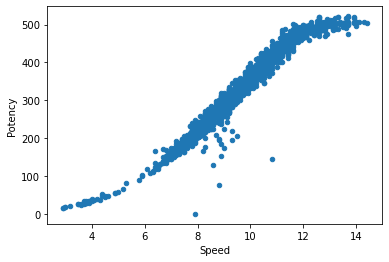

In [156]:
df.plot.scatter('Speed', 'Potency')

<AxesSubplot:>

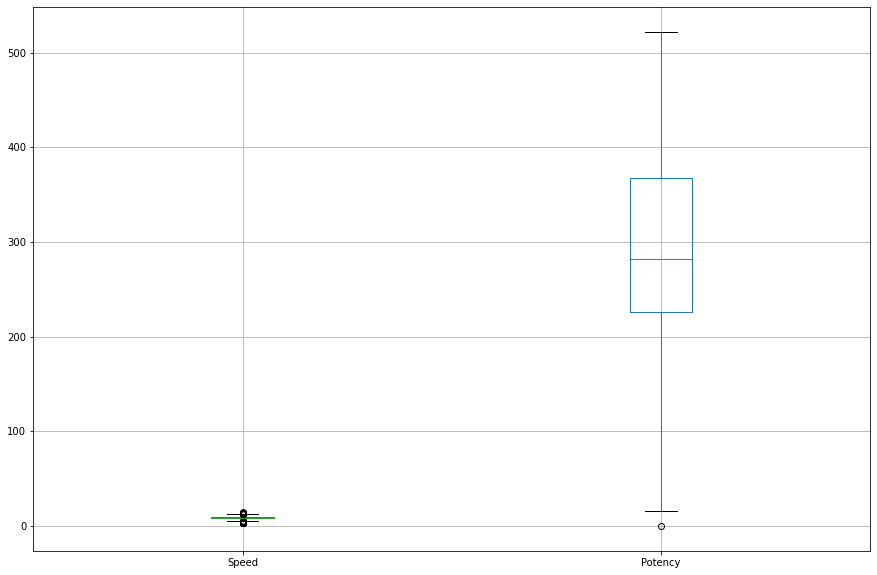

In [157]:
df.boxplot(figsize=(15,10))

In [158]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns="Potency"), df["Potency"], test_size=0.25, shuffle=True)

In [159]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [160]:
pred = model.predict(x_test)

In [161]:
print(f"MAE : {mean_absolute_error(y_test, pred)}")
print(f"MSE : {mean_squared_error(y_test, pred)}")
print(f"MSSE : {np.sqrt(mean_squared_error(y_test, pred))}")

MAE : 15.466920653086214
MSE : 513.2852501418022
MSSE : 22.655799481408778


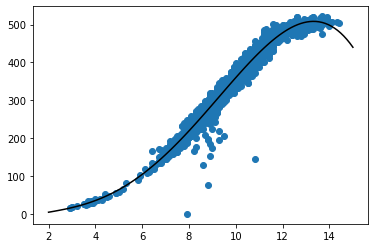

In [162]:
test = np.polyfit(df["Speed"], df["Potency"], 4)
mymodel = np.poly1d(test)

myline = np.linspace(2, 15, 100)

plt.scatter(df["Speed"], df["Potency"])
plt.plot(myline, mymodel(myline), color="black")
plt.show()

In [163]:
y_predict  = []
for i in x_test['Speed'].values:
    y_predict.append(mymodel(i))

In [164]:

print(f'MAE : {mean_absolute_error(y_test, y_predict)}')
print(f'MSE : {mean_squared_error(y_test, y_predict)}')
print(f'MSSE : {np.sqrt(mean_squared_error(y_test, y_predict))}')

MAE : 10.78150628813802
MSE : 287.96549510278095
MSSE : 16.96954610774198


## Remove Outliers

In [165]:
clf = LocalOutlierFactor(n_neighbors=3,n_jobs=-1)
pred = clf.fit_predict(df)

In [166]:
new_df = {"Speed":[],"Potency":[]}
acum = 0
for i in df.index:
    if pred[i] == 1:
        new_df['Speed'].append(df["Speed"][i])
        new_df['Potency'].append(df["Potency"][i])
    else:
        acum += 1
new_df = pd.DataFrame(new_df)
print(f"Remove {acum} outliers")

Remove 495 outliers


<AxesSubplot:xlabel='Speed', ylabel='Potency'>

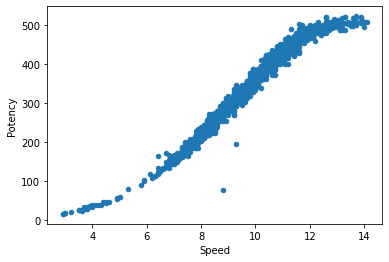

In [167]:
new_df.plot.scatter('Speed', 'Potency')

In [168]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns='Potency'), new_df['Potency'], test_size=0.25, shuffle=True)


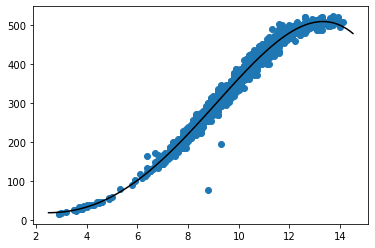

In [169]:
test = np.polyfit(new_df['Speed'], new_df['Potency'], 4)
mymodel = np.poly1d(test)

myline = np.linspace(2.5, 14.5, 100)

plt.scatter(new_df['Speed'], new_df['Potency'])
plt.plot(myline, mymodel(myline), color='black')
plt.show()

In [170]:
y_predict  = []
for i in X_test['Speed'].values:
    y_predict.append(mymodel(i))

In [171]:
print(f'MAE removing outliers: {mean_absolute_error(y_test, y_predict)}')
print(f'MSE removing outliers: {mean_squared_error(y_test, y_predict)}')
print(f'MSSE removing outliers: {np.sqrt(mean_squared_error(y_test, y_predict))}')

MAE removing outliers: 8.92443244899112
MSE removing outliers: 157.03405154772778
MSSE removing outliers: 12.531322817154132


Full Dataframe x Removing Outliers


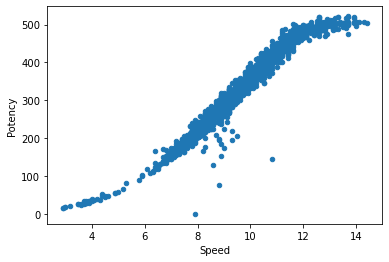

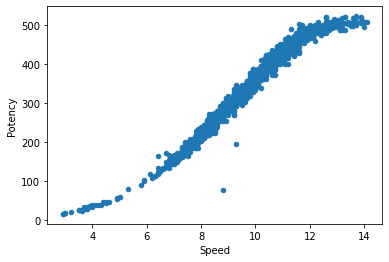

In [172]:
print("Full Dataframe x Removing Outliers")
df.plot.scatter('Speed', 'Potency');
new_df.plot.scatter('Speed', 'Potency');